### Import necessary libraries

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [9]:
spam = pd.read_csv('spam.csv')

### Split the dataset into training and testing sets

In [10]:
z = spam['v2']
y = spam["v1"]
z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)

### Convert email text into a matrix of token counts using CountVectorizer

In [11]:
cv = CountVectorizer()
features = cv.fit_transform(z_train)

### Create an SVM model and fit it to the training data

In [12]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

### Transform the test set using CountVectorizer and calculate the model's accuracy

In [13]:
features_test = cv.transform(z_test)
print("Accuracy: {:.2f}%".format(model.score(features_test,y_test)*100))

Accuracy: 98.03%


### Predict on the test set, create a confusion matrix, and visualize the confusion matrix using seaborn's heatmap function

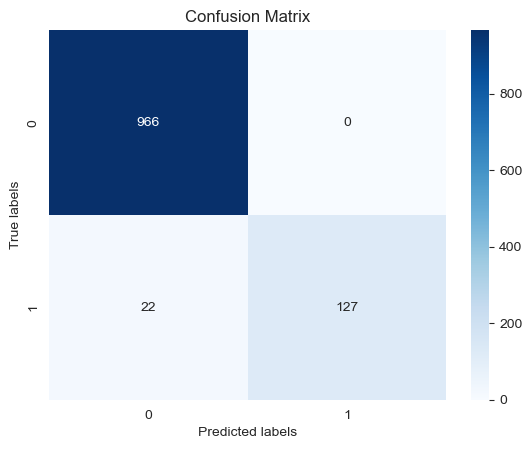

In [14]:
# Predict on the test set
y_pred = model.predict(features_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["ham", "spam"])

# Plot heatmap of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()
